<a href="https://colab.research.google.com/github/MaximilianoVM/DATA-MINIG-2023-1/blob/main/SAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.6 MB/s eta 0:00:00


In [ ]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation

In [ ]:
# Parameters
n_samples, n_timestamps = 100, 24

In [ ]:
# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

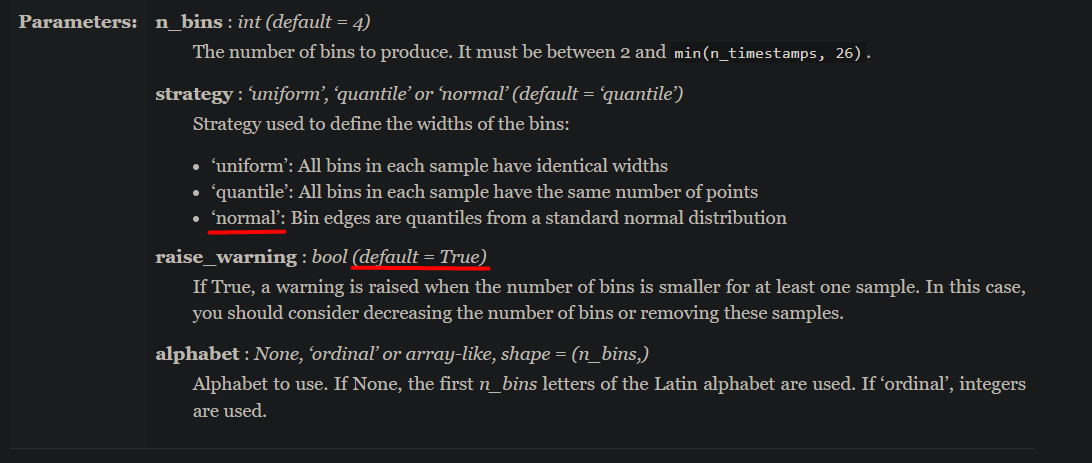

**What is a bin?**
In the context of SAX (Symbolic Aggregate approXimation), a bin refers to a range of values into which the values of a time series are quantized or discretized. The number of bins used to quantize the data determines the number of distinct symbols that can be used to represent subsequences of the time series. The binning process in SAX converts the continuous time series into a symbolic representation, where each symbol represents the mean of the values falling within a particular bin. This allows for efficient storage and processing of time series data, as well as the use of pattern recognition techniques based on symbolic representations.

In [ ]:
# SAX transformation
n_bins = 3
#class pyts.approximation.SymbolicAggregateApproximation(n_bins=4, strategy='quantile', raise_warning=True, alphabet=None)
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
#fit_transform(X[, y]): Fit to data, then transform it.
X_sax = sax.fit_transform(X)




*   **norm:** refers to the <b>scipy.stats.norm module</b>, which contains various statistical functions related to the normal (Gaussian) distribution.
*   **np.linspace(0, 1, n_bins + 1):** creates an array of *n_bins + 1* equally spaced numbers between 0 and 1, inclusive.
*   **[1:-1]:** slices the array to remove the first and last elements, leaving only the interior numbers.
*   **norm.ppf():** takes an input probability value and returns the corresponding quantile of the normal distribution. In this case, it is applied to each interior number of the linspace array to transform them into Gaussian quantiles.



The resulting quantiles represent the boundaries of equally spaced Gaussian bins, which can be used to discretize a continuous variable for subsequent analysis.

In [ ]:
# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])

The following code is creating a boolean array <b>bottom_bool</b> to indicate the positions of the last symbol in each sliding window of a time series represented using Symbolic Aggregate approXimation (SAX).

Here, <b>X_sax</b> is a 2D numpy array containing the SAX representation of multiple time series. <b>X_sax[0]</b> refers to the first time series in the dataset.

The boolean array <b>bottom_bool</b> is created by comparing consecutive pairs of symbols in the SAX representation of the first time series <b>X_sax[0]</b>. The comparison is done by subtracting each symbol from the next symbol in <b>X_sax[0]</b> and checking if the result is positive. The first element of <b>bottom_bool</b> is always set to True, and the rest of the elements in <b>bottom_bool</b> are set based on the comparison result.

The resulting bottom_bool array will have a length of <b>n_bins</b>, which is the number of bins used to discretize the time series. The True values in <b>bottom_bool</b> indicate the positions of the last symbols in each sliding window of the SAX representation of the first time series.

In [ ]:
# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

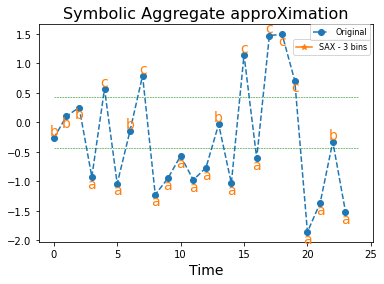

In [ ]:

plt.figure(figsize=(6, 4))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()